# Pymaceuticals Inc.
---

### Analysis

- One mouse had duplicate entries or multiple entries from the same timepoints and this mouse was dropped. 

- Summary statistics for mean and median tumor volume, tumor volume variance, tumor volume standard deviation, and tumor volume standard error for each of the drug regimens are displayed below.

- The Capomulin and Ramicane drug regimens had a higher total number of timepoints compared to other drug regimens. 

- The distribution of gender in the sample was fairly even (Males = 50.96% and Females = 49.04%). Pie charts are displayed below showing the distribution.

- Only one drug regimen of the four selected (Capomulin, Ramicane, Infubinol, and Ceftamin) had potential outliers regarding tumor volume. Infubinol had two potential outlier tumor volume values. The box plot showing the outliers is displayed below. 

- A line plot is also depicted below for one mouse (mouse l509) showing the  size of the mouse’s tumor volume over a number of days. The line plot shows an increase in tumor volume until the 20th day and then a steep drop off following the 20th day. Tumor volume starts to increase again after roughly the 35th day. 

- A scatter plot is also depicted below along with the correlation value and regression line showing the relationship between mouse weight and average tumor volume for the Capomulin regimen. Weight and average tumor volume are highly positively correlated indicating that the more the mouse weighs, the larger their average tumor volume. 
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice.
number_of_mice = mouse_data_complete["Mouse ID"].nunique()
number_of_mice

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete[mouse_data_complete[["Mouse ID", "Timepoint"]].duplicated()]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] == 'g989', :]
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_complete[mouse_data_complete["Mouse ID"]!= 'g989']


In [63]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_mouse_df["Mouse ID"].nunique()
number_of_mice_clean


248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = clean_mouse_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_regimen_std = clean_mouse_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_regimen_med = clean_mouse_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_regimen_var = clean_mouse_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_regimen_sem = clean_mouse_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume" : drug_regimen_mean,
                                            "Median Tumor Volume" : drug_regimen_med,
                                            "Tumor Volume Variance" : drug_regimen_var,
                                            "Tumor Volume St. Dev." : drug_regimen_std,
                                            "Tumor Volume Std. Err." : drug_regimen_sem})

drug_regimen_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_regimen_summary2 = clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var', 'std', 'sem']})
drug_regimen_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

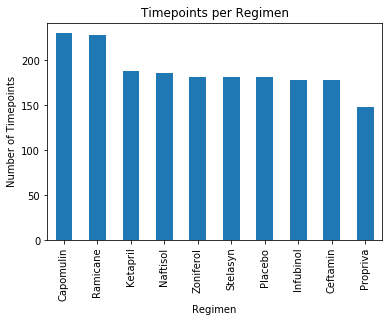

<Figure size 432x288 with 0 Axes>

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Group by Drug Regimen
groupby_regimen = clean_mouse_df.groupby('Drug Regimen')

# Total counts for each timepoint
total_timepoints = groupby_regimen['Timepoint'].count()
total_timepoints= total_timepoints.sort_values(ascending=False)

# Create a title, x label, and y label
regimen_bar = total_timepoints.plot(kind="bar", title="Timepoints per Regimen")
regimen_bar.set_xlabel("Regimen")
regimen_bar.set_ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()


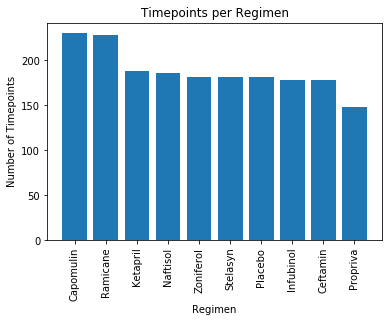

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(total_timepoints.index, total_timepoints.values)
plt.title('Timepoints per Regimen')
plt.xlabel('Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation = 90)
plt.show()


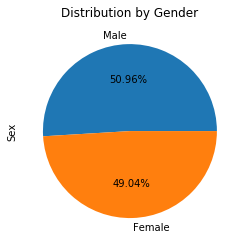

<Figure size 432x288 with 0 Axes>

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_sex = clean_mouse_df['Sex'].value_counts()
# Create a title, x label, and y label
gender_pie = groupby_sex.plot(kind="pie", title="Distribution by Gender", autopct='%.2f%%')

plt.show()
plt.tight_layout()



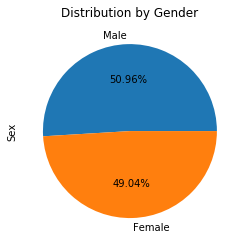

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(groupby_sex, labels = groupby_sex.index,autopct='%.2f%%')
plt.title("Distribution by Gender")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_df.groupby("Mouse ID").max()[["Timepoint"]].reset_index()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(max_timepoint, clean_mouse_df, how= "left", on=["Mouse ID", "Timepoint"] )
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = merge_df.loc[merge_df["Drug Regimen"]== d, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_df)

    #Calculate quartiles and outliers
    quartiles = tumor_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_df[(tumor_df<lower_bound) | (tumor_df>upper_bound)]
    print(d, outliers)
    

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


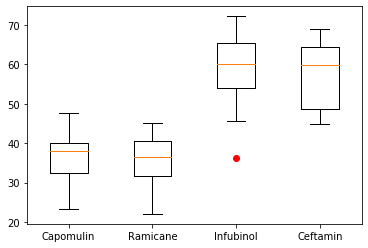

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,labels=drug_list, sym="r")
plt.show()


## Line and Scatter Plots

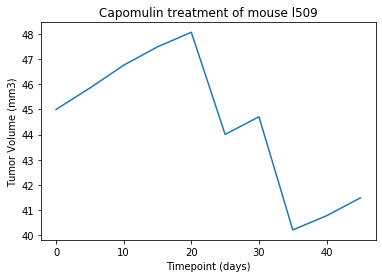

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = clean_mouse_df[(clean_mouse_df["Drug Regimen"]== "Capomulin") & (clean_mouse_df["Mouse ID"] == "l509")][["Tumor Volume (mm3)", "Timepoint"]]
plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

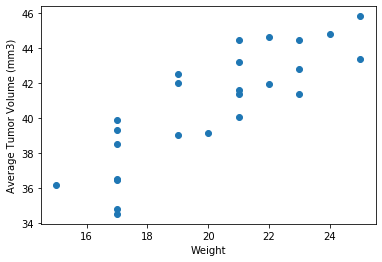

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin"]
average_tumor_volume = Capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
weight = Capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]
plt.scatter(weight,average_tumor_volume)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between both factors is 0.84


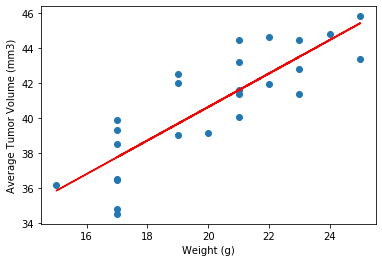

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Plot and add the regression line
x_values = weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

